# Example Prediction Temperature Working on First Month To Predict The temperature of Weekly Nasa Dataset

In [1]:
import pandas as pd
data = pd.read_csv('Monthtwo.csv')
data.columns

Index(['ALLSKY_KT', 'WS2M', 'T2M', 'PS', 'WS10M', 'QV2M', 'RH2M'], dtype='object')

In [2]:
data.shape

(1102, 7)

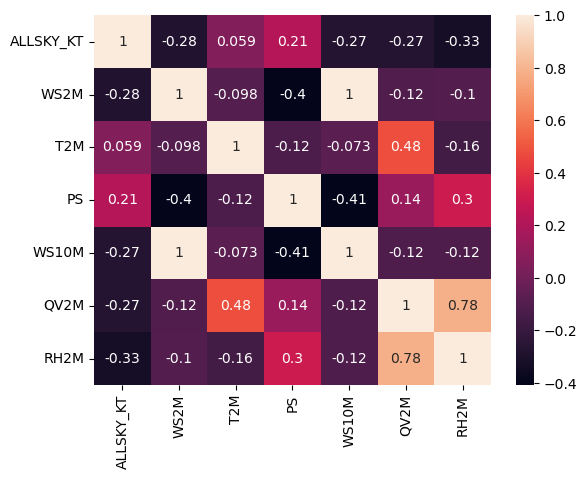

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [4]:
data.head(5)

,ALLSKY_KT,WS2M,T2M,PS,WS10M,QV2M,RH2M
0,0.019323,1.086888,8.271681,0.268809,1.193828,2.622841,-12.736381
1,-0.100677,-0.063112,8.751681,0.568809,-0.186172,3.662841,-3.116381
2,0.289323,-1.503111,11.231681,0.908809,-1.936172,3.662841,-11.736381
3,0.069323,-0.243112,9.401681,0.098809,-0.566172,2.752841,-16.616381
4,0.029323,0.486889,8.581681,-0.291191,0.403828,2.142841,-19.926381


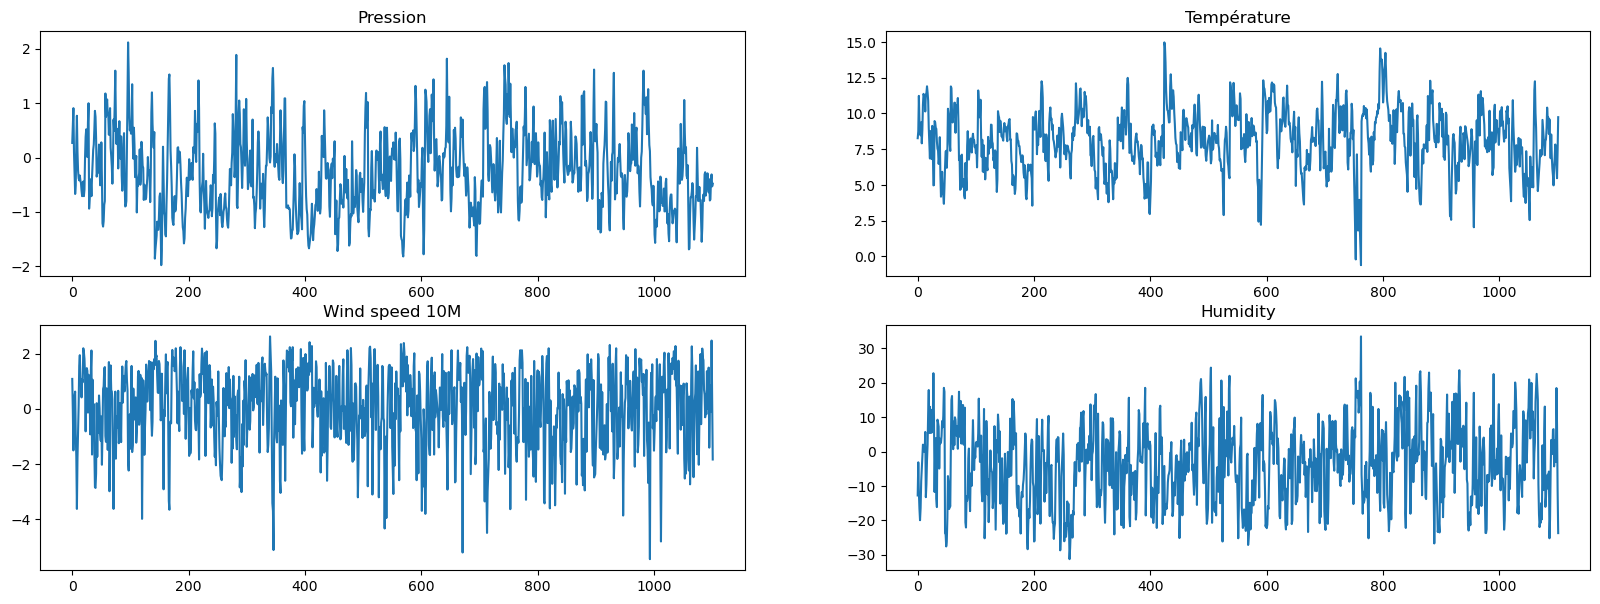

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,7))
# Évolution de la pression
ax1 = fig.add_subplot(221)
plt.plot(data['PS'])
ax1.title.set_text('Pression')
# Évolution de la température
ax2 = fig.add_subplot(222)
plt.plot(data['T2M'])
ax2.title.set_text('Température')
# Évolution de la vont
ax3 = fig.add_subplot(223)
plt.plot(data['WS2M'])
ax3.title.set_text('Wind speed 10M')
# Évolution du déficit de himidité de vapeur
ax4 = fig.add_subplot(224)
plt.plot(data['RH2M'])
ax4.title.set_text('Humidity')
# Evolution de radation
#ax5 = fig.add_subplot(225)
#plt.plot(data['Radiation'])
#ax5.title.set_text('Radation')

plt.show()

In [6]:
split_fraction = 0.80
split_idx = int(split_fraction * len(data))
# Train: on conserve les 80% premières lignes
train_data = data.loc[0:split_idx-1].values
# Test: on conserve les 20% dernières lignes
val_data = data.loc[split_idx:].values
print(f"Jeu d'apprentissage : {train_data.shape}, jeu d'évaluation : {val_data.shape}")

Jeu d'apprentissage : (881, 7), jeu d'évaluation : (221, 7)


### Train The NN and obtimise with descente de gradient

In [7]:
# Importation 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib as plt

In [8]:
# Création du jeu d'entraînement
sampling_rate = 1 # Fréquence d'échantillonnage
sequence_length = 120  # Longueur de la séquence
batch_size = 256 # Taille de batch

# Création du jeu d'entraînement: contient Temperature, Pressure, Humidity, WindSpeed, day length
X_train = tf.keras.utils.timeseries_dataset_from_array(
    data=train_data[:, (0,1,3,4,5,6)],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

y_train = tf.keras.utils.timeseries_dataset_from_array(
    data=train_data[:, 2],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

dataset_train = tf.data.Dataset.zip((X_train, y_train))
# Création du jeu d'évaluation

X_val = tf.keras.utils.timeseries_dataset_from_array(
    data=val_data[:, (0,1,3,4,5,6)],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

y_val = tf.keras.utils.timeseries_dataset_from_array(
    data=val_data[:, 2],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

dataset_val = tf.data.Dataset.zip((X_val, y_val))

# Training The RNN To Predict Scond Month

In [9]:
# from tensorflow import keras

dimension = train_data.shape[1]-1
inputs = keras.layers.Input(shape=(sequence_length, dimension))
gru_out = keras.layers.GRU(dimension, return_sequences=True)(inputs)
dense_out = keras.layers.Dense(dimension, activation='relu')(gru_out)
outputs = keras.layers.Dense(1)(dense_out)

model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
learning_rate = 0.001
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 6)]          0         
                                                                 
 gru (GRU)                   (None, 120, 6)            252       
                                                                 
 dense (Dense)               (None, 120, 6)            42        
                                                                 
 dense_1 (Dense)             (None, 120, 1)            7         
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [11]:
epochs = 100
model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
)

Epoch 1/100
3/3 [==============================] - 4s 401ms/step - loss: 81.4040 - val_loss: 74.2540
Epoch 2/100
3/3 [==============================] - 0s 116ms/step - loss: 80.8631 - val_loss: 73.7622
Epoch 3/100
3/3 [==============================] - 0s 116ms/step - loss: 80.3389 - val_loss: 73.2854
Epoch 4/100
3/3 [==============================] - 0s 117ms/step - loss: 79.8300 - val_loss: 72.8255
Epoch 5/100
3/3 [==============================] - 0s 118ms/step - loss: 79.3361 - val_loss: 72.3843
Epoch 6/100
3/3 [==============================] - 0s 117ms/step - loss: 78.8616 - val_loss: 71.9557
Epoch 7/100
3/3 [==============================] - 0s 115ms/step - loss: 78.4065 - val_loss: 71.5419
Epoch 8/100
3/3 [==============================] - 0s 116ms/step - loss: 77.9666 - val_loss: 71.1445
Epoch 9/100
3/3 [==============================] - 0s 116ms/step - loss: 77.5415 - val_loss: 70.7626
Epoch 10/100
3/3 [==============================] - 0s 126ms/step - loss: 77.1294 - val_los

3/3 [==============================] - 0s 115ms/step - loss: 46.3204 - val_loss: 40.7577
Epoch 82/100
3/3 [==============================] - 0s 116ms/step - loss: 45.1949 - val_loss: 39.7004
Epoch 83/100
3/3 [==============================] - 0s 116ms/step - loss: 44.0950 - val_loss: 38.6703
Epoch 84/100
3/3 [==============================] - 0s 114ms/step - loss: 43.0239 - val_loss: 37.6696
Epoch 85/100
3/3 [==============================] - 0s 115ms/step - loss: 41.9834 - val_loss: 36.6988
Epoch 86/100
3/3 [==============================] - 0s 116ms/step - loss: 40.9738 - val_loss: 35.7576
Epoch 87/100
3/3 [==============================] - 0s 122ms/step - loss: 39.9941 - val_loss: 34.8445
Epoch 88/100
3/3 [==============================] - 0s 122ms/step - loss: 39.0426 - val_loss: 33.9577
Epoch 89/100
3/3 [==============================] - 0s 116ms/step - loss: 38.1170 - val_loss: 33.0952
Epoch 90/100
3/3 [==============================] - 0s 108ms/step - loss: 37.2153 - val_loss: 3

In [13]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import scatter
def show_plot(predicted_data, true_data):
    plt.title('Prédiction synchrone')
    plt.plot(predicted_data, "rx", label="Temperature prédite")
    plt.plot(true_data, ".-", label="Vraie Temperature")
    plt.legend()
    plt.xlabel("Pas de temps")
    plt.show()
    return

4/4 [==============================] - 1s 15ms/step


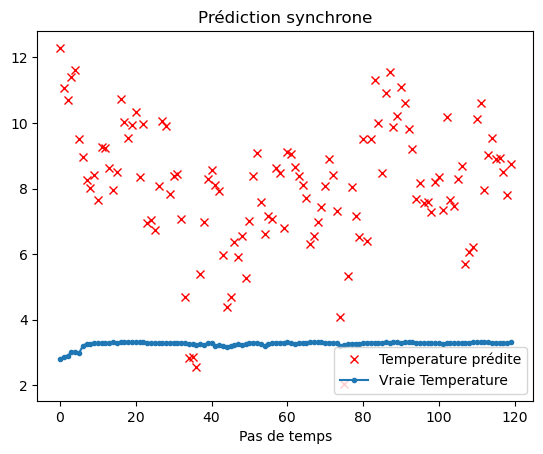

In [14]:
for x, y in dataset_val.take(3):
     show_plot(y[0].numpy(), model.predict(x)[0])

In [15]:
mean_absolute_error = tf.keras.losses.MeanAbsoluteError()
error = 0

for x, y in dataset_val:
    y_pred = model(x)
    error += mean_absolute_error(y, y_pred).numpy()

print(f"Erreur absolue moyenne : {error/len(dataset_val):.5f}")


Erreur absolue moyenne : 4.63379


## Prédiction de la température future

In [16]:
past_length = 120
future_step = 1

label_start = past_length + future_step  # Début de la séquence des labels
label_end = label_start + split_idx  # Fin de la séquence des labels

x_train = train_data
y_train = data[label_start:label_end][['T2M']]

x_end = len(val_data) - past_length - future_step # Fin de la séquence des données d'entrées en validation

label_start = split_idx + past_length + future_step # Début de la séquence des labels en validation
x_val = val_data[:x_end]
y_val = data[label_start:][['T2M']]

In [17]:
batch_size = 256
step_size = 1 # Facteur d'échantillonnage
sequence_length = int(past_length / step_size)

dataset_train = tf.keras.utils.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step_size,
    batch_size=batch_size,
)

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step_size,
    batch_size=batch_size,
)

In [18]:
learning_rate = 0.001

input_dim = train_data.shape[1]
hidden_dim = 32
inputs = keras.layers.Input(shape=(sequence_length, input_dim))
gru_out = keras.layers.GRU(hidden_dim)(inputs)
dense_out = keras.layers.Dense(hidden_dim, activation='relu')(gru_out)
outputs = keras.layers.Dense(1)(dense_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 gru_1 (GRU)                 (None, 32)                3936      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [19]:
epochs = 50

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
)

Epoch 1/50
3/3 [==============================] - 3s 159ms/step - loss: 69.2305
Epoch 2/50
3/3 [==============================] - 1s 167ms/step - loss: 64.1301
Epoch 3/50
3/3 [==============================] - 0s 158ms/step - loss: 59.4628
Epoch 4/50
3/3 [==============================] - 0s 150ms/step - loss: 55.2168
Epoch 5/50
3/3 [==============================] - 0s 140ms/step - loss: 51.3211
Epoch 6/50
3/3 [==============================] - 0s 142ms/step - loss: 47.6625
Epoch 7/50
3/3 [==============================] - 0s 146ms/step - loss: 44.1356
Epoch 8/50
3/3 [==============================] - 0s 147ms/step - loss: 40.6972
Epoch 9/50
3/3 [==============================] - 0s 142ms/step - loss: 37.3049
Epoch 10/50
3/3 [==============================] - 0s 143ms/step - loss: 33.9364
Epoch 11/50
3/3 [==============================] - 0s 146ms/step - loss: 30.5859
Epoch 12/50
3/3 [==============================] - 0s 145ms/step - loss: 27.2644
Epoch 13/50
3/3 [====================

In [20]:
def show_plot(sequence, prediction, ground_truth, delta=future_step/step_size, title=None):
    plt.title(title)
    plt.plot(sequence.flatten(), ".-", label="Temperature")
    plt.plot(len(sequence) + delta, prediction, "go", label="Prédiction")
    plt.plot(len(sequence) + delta, ground_truth, "rx", label="Vraie Temperature")
    plt.legend()
    plt.xlim(-1, len(sequence) + delta + 3)
    plt.xlabel("Pas de temps")
    plt.show()

In [21]:
for x, y in dataset_val.take(5):
    show_plot(x[0][:, 1].numpy(), model.predict(x)[0], y[0].numpy(), title="Prédiction de la Temperature")

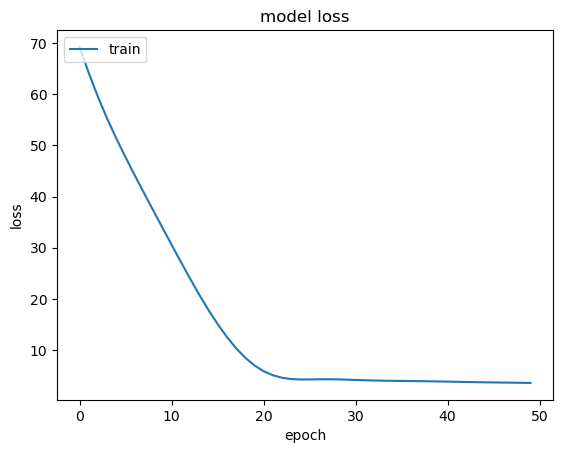

In [22]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()